In [1]:
import json
import pickle
import numpy as np
import os.path as op
import itertools as it
from utilities import files
import matplotlib.pylab as plt
from joblib import Parallel, delayed
from tqdm.notebook import trange, tqdm
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter, gaussian_filter1d
from extra.tools import many_is_in, cat, shuffle_array, shuffle_array_range, consecutive_margin_ix, dump_the_dict

In [2]:
waveform_subset_path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/waveforms_clean_subset_fit.npy"
scaler_path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/scaler_MEG.pkl"
PCA_path = "/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/pca_solution_MEG.pkl"
dataset = "/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/sub_metrics.pkl"

In [3]:
waveforms_clean = np.load(waveform_subset_path)
scaler_meg = pickle.load(open(scaler_path, "rb"))
PCA_saved = pickle.load(open(PCA_path, "rb"))


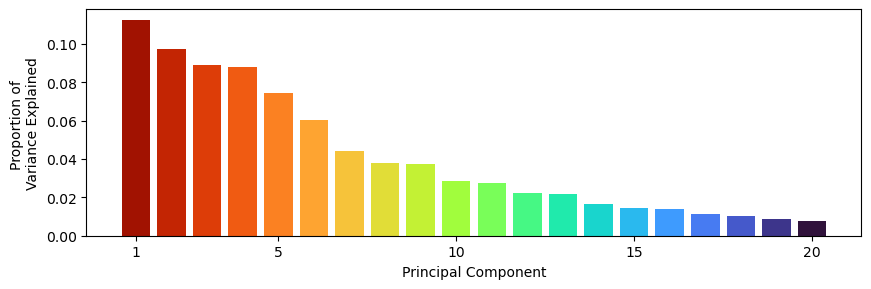

In [5]:
shuff_range = np.linspace(8, 148, 7, endpoint=True).astype(int)
shuff_range = np.insert(shuff_range, 0, 0)
shuff_range = np.append(shuff_range, 156)
shuff_range = list(zip(shuff_range[:-1], shuff_range[1:]))
waveform_scaled = scaler_meg.transform(waveforms_clean)

In [6]:
shuffled_var_exp_ratio_file = "/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/shuffled_var_exp_ratio.npy"
if op.exists(shuffled_var_exp_ratio_file):
    pca_vars = np.load(shuffled_var_exp_ratio_file)
    shuffling_results = np.mean(np.vstack([i <= PCA_saved.explained_variance_ratio_ for i in pca_vars]), axis=0)
else:
    iter_no = 100
    pca_vars = []
    for i in trange(iter_no):
        np.random.seed()
        shuffled_waveforms = shuffle_array_range(waveform_scaled, shuff_range)
        pca_shuff = PCA(n_components=20)
        pca_shuff.fit(shuffled_waveforms)
        pca_vars.append(pca_shuff.explained_variance_ratio_)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
shuffling_results

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

(0.0, 0.12)

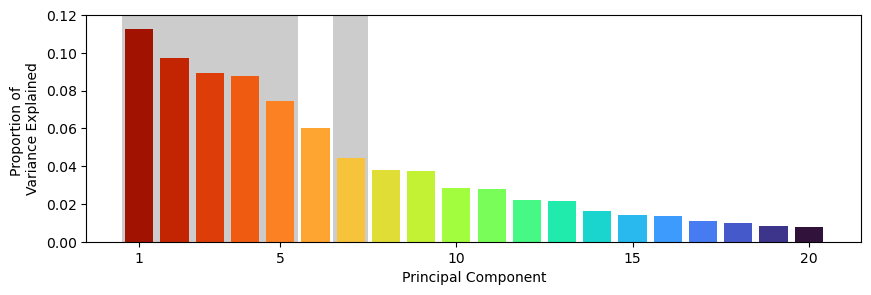

In [24]:
f, ax = plt.subplots(1, 1, figsize=(10,3), dpi=100, facecolor="white")
PC_var_exp = PCA_saved.explained_variance_ratio_
PC_r = np.arange(PC_var_exp.shape[0]) + 1
bar = ax.bar(PC_r, shuffling_results, lw=0.2, color="black", alpha=0.2, width=1)
bar = ax.bar(PC_r, PC_var_exp, lw=0.2)
cm = plt.cm.get_cmap("turbo_r")
for i in PC_r:
    plt.setp(bar[i-1],"facecolor", cm(i/20))
ax.set_xlabel("Principal Component")
ax.set_ylabel("Proportion of \nVariance Explained")
ax.set_xticks([1, 5, 10, 15, 20]);
ax.set_ylim(0, 0.12)